In [1]:
using Pkg
Pkg.activate("../..")

  Activating environment at `~/Documents/repos/nanoOpt.jl/Project.toml`


In [2]:
using LazyGrids,SpecialFunctions,Measures,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

In [4]:
mat1 = material(1.33^2,1.0)
mat2 = material(1.0,1.0)
λ = 632
k0 = 2π/λ
NA=1.0

1.0

In [5]:
n = 10
xx,yy = collect(LinRange(50,1000,n)), collect(LinRange(-3500,3500,n))

dip = [repeat([1.0 0.0 0.0],n);
repeat([1.0 0.0 0.0],n)]
pos = [-0.5 * xx yy 0*xx;
 0.5 * xx yy 0*xx];

Dipols = Dipoles(mat1,k0,dip,pos)

x,y = 2000*collect(LinRange(-1,1,501)), 5000*collect(LinRange(-1,1,1501));

In [6]:
npad=1
z=50.0
e1 = eplane(Dipols,x,y,npad,z);

In [7]:
ang = Angular(x,y,e1,mat1,k0,1,2)
farf = far(ang);

In [8]:
lens = lensimage2(ang,mat2,NA)
efar = efieldC(lens,farf.far) ./(k0^2/(4π)^2);

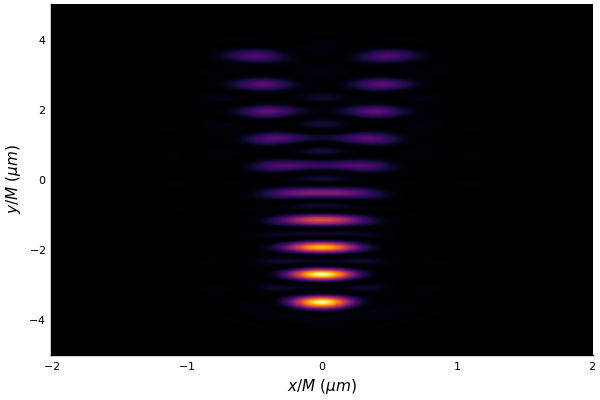

In [9]:

Ett = sum(real(conj(efar).*efar),dims=3)[:,:,1]

heatmap(x/1000,y/1000,Ett',colorbar=false,xlabel=L"x/M~(\mu m)",ylabel=L"y/M~(\mu m)")